In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [183]:
df = pd.read_csv("Data/train.csv")

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [185]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

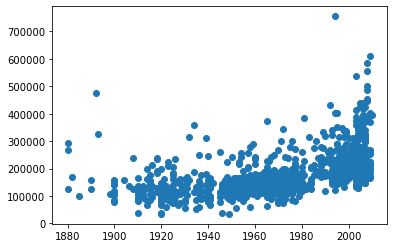

In [186]:
fig, ax = plt.subplots()
ax.scatter(df["YearBuilt"][:1000], df["SalePrice"][:1000])

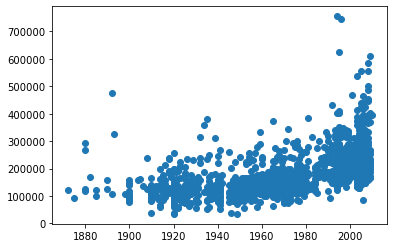

In [187]:
fig, ax = plt.subplots()
ax.scatter(df["YearBuilt"], df["SalePrice"])

In [188]:
df.YearBuilt[:1000]

0      2003
1      1976
2      2001
3      1915
4      2000
       ... 
995    1946
996    1961
997    1970
998    1922
999    2006
Name: YearBuilt, Length: 1000, dtype: int64

In [189]:
df.YearBuilt.dtype

dtype('int64')

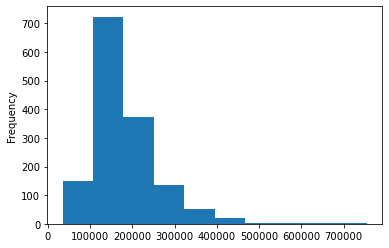

In [190]:
df.SalePrice.plot.hist();

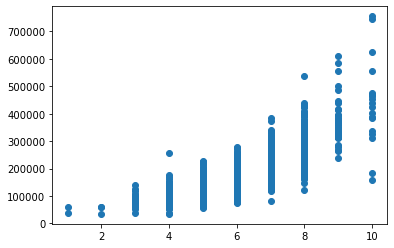

In [191]:
fig, ax = plt.subplots()
ax.scatter(df["OverallQual"], df["SalePrice"]);

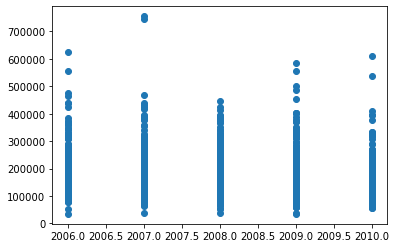

In [192]:
fig, ax = plt.subplots()
ax.scatter(df["YrSold"], df["SalePrice"]);

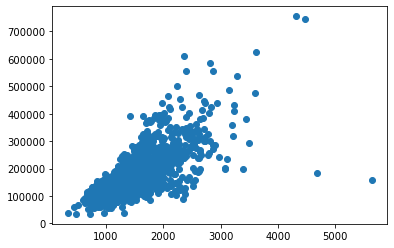

In [193]:
fig, ax = plt.subplots()
ax.scatter(df["GrLivArea"], df["SalePrice"]);

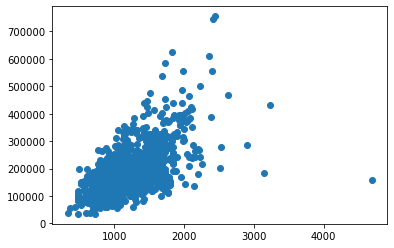

In [194]:
fig, ax = plt.subplots()
ax.scatter(df["1stFlrSF"], df["SalePrice"]);

In [195]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
MoSold,2,5,9,2,12
YrSold,2008,2007,2008,2006,2008
SaleType,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal


In [196]:
df_tmp = df.copy()

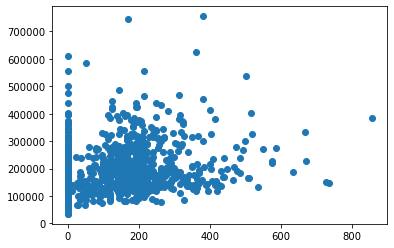

In [197]:
fig, ax = plt.subplots()
ax.scatter(df["WoodDeckSF"], df["SalePrice"]);

In [198]:
df["WoodDeckSF"].corr(df["SalePrice"])

0.3244134445681295

In [199]:
df_temp = df[["WoodDeckSF","SalePrice"]]

In [200]:
df_temp.head()

,WoodDeckSF,SalePrice
0,0,208500
1,298,181500
2,0,223500
3,0,140000
4,192,250000


In [201]:
df_temp.drop(df_temp[df_temp.WoodDeckSF == 0].index, inplace=True)

C:\Users\GREIGB~1\AppData\Local\Temp/ipykernel_34180/1600650262.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.drop(df_temp[df_temp.WoodDeckSF == 0].index, inplace=True)


In [202]:
df_temp.head()

,WoodDeckSF,SalePrice
1,298,181500
4,192,250000
5,40,143000
6,255,307000
7,235,200000


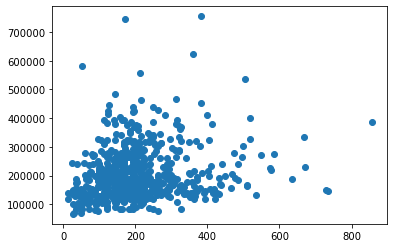

In [203]:
fig, ax = plt.subplots()
ax.scatter(df_temp["WoodDeckSF"], df_temp["SalePrice"]);

In [204]:
df_temp["WoodDeckSF"].corr(df_temp["SalePrice"])

0.19370601237520668

In [205]:
df["MoSold"].corr(df["SalePrice"])

0.04643224522381939

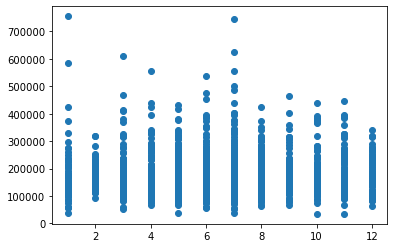

In [206]:
fig, ax = plt.subplots()
ax.scatter(df["MoSold"], df["SalePrice"]);

In [207]:
df_tmp.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [208]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

#model.fit(df_edit.drop("SalePrice", axis=1), df_edit["SalePrice"])
#This breaks! So leave coded out!!!


In [209]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [210]:
df_tmp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [211]:
df_tmp.Neighborhood.cat.categories

Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
       'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')

In [212]:
df_tmp.Neighborhood.cat.codes

0        5
1       24
2        5
3        6
4       15
        ..
1455     8
1456    14
1457     6
1458    12
1459     7
Length: 1460, dtype: int8

In [213]:
# Check missing data
df_tmp.isnull().sum()/len(df_tmp)

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [214]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
GarageYrBlt


In [215]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [216]:
# Check if there's any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [217]:
df_tmp.isna().sum()

Id                        0
MSSubClass                0
MSZoning                  0
LotFrontage               0
LotArea                   0
                         ..
SaleCondition             0
SalePrice                 0
LotFrontage_is_missing    0
MasVnrArea_is_missing     0
GarageYrBlt_is_missing    0
Length: 84, dtype: int64

In [218]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [219]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 127 entries, Id to SaleCondition_is_missing
dtypes: bool(46), float64(3), int64(35), int8(43)
memory usage: 560.5 KB


In [220]:
df_tmp.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,4,4,4,4,4
LotFrontage,65.0,80.0,68.0,60.0,84.0
LotArea,8450,9600,11250,9550,14260
...,...,...,...,...,...
PoolQC_is_missing,True,True,True,True,True
Fence_is_missing,True,True,True,True,True
MiscFeature_is_missing,True,True,True,True,True
SaleType_is_missing,False,False,False,False,False


In [221]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

Wall time: 1.69 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [222]:
# Score the model
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9803832555688455

In [223]:
df_tmp.to_csv("Working/df_tmp.csv", index=False)

## Splitting the data

In [224]:
df_tmp.YrSold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

In [225]:
len(df_tmp)

1460

In [226]:
175 / 1460

0.11986301369863013

In [227]:
# Split train and validation

df_val = df_tmp[df_tmp.YrSold == 2010]
df_train = df_tmp[df_tmp.YrSold != 2010]

len(df_val), len(df_train)

(175, 1285)

In [228]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1285, 126), (1285,), (175, 126), (175,))

## Evaluation Function

In [229]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [230]:
%%time

model.fit(X_train, y_train)

Wall time: 2.33 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [231]:
show_scores(model)

{'Training MAE': 6712.524723735408,
 'Valid MAE': 16051.119485714287,
 'Training RMSLE': 0.06275394163189223,
 'Valid RMSLE': 0.13494290684404767,
 'Training R^2': 0.9786620495147615,
 'Valid R^2': 0.8987581036190159}

## Hyperparameter tuning with RandomisedSearchCV

In [232]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Wall time: 2.83 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [233]:
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 4,
 'min_samples_leaf': 9,
 'max_features': 0.5,
 'max_depth': 5}

In [234]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 18024.602306006575,
 'Valid MAE': 20585.82064317921,
 'Training RMSLE': 0.15698157137888444,
 'Valid RMSLE': 0.17827377318282867,
 'Training R^2': 0.8700401811965277,
 'Valid R^2': 0.8412171825963938}

## Train a model with best Hyperparameters

In [235]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=30,
                                    min_samples_leaf=11,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

Wall time: 340 ms


RandomForestRegressor(max_features=0.5, min_samples_leaf=11,
                      min_samples_split=14, n_estimators=30, n_jobs=-1,
                      random_state=42)

In [236]:
show_scores(ideal_model)

{'Training MAE': 15076.007678531812,
 'Valid MAE': 18400.86161489271,
 'Training RMSLE': 0.13225284454960806,
 'Valid RMSLE': 0.15791356710494714,
 'Training R^2': 0.8870857387258946,
 'Valid R^2': 0.8608484295458867}

## Make predictions on data

In [250]:
# Import the test data
df_test = pd.read_csv("Data/Test.csv")

df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Preprocess the data

In [251]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    
    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())
    
        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1
    
    return df

In [266]:
# Process the test data 
df_test = preprocess_data(df_test)
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageYrBlt_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,True,True,True,False,False


In [267]:
df_test_copy = df_test.copy()
df_test_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageYrBlt_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,True,True,True,False,False


In [268]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test_copy.columns), set(df_test_copy.columns) - set(X_train.columns)

(set(), set())

In [269]:
df_test_reorder = df_test_copy[X_train.columns]
df_test_reorder.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_is_missing,GarageFinish_is_missing,GarageQual_is_missing,GarageCond_is_missing,PavedDrive_is_missing,PoolQC_is_missing,Fence_is_missing,MiscFeature_is_missing,SaleType_is_missing,SaleCondition_is_missing
0,1461,20,3,80.0,11622,2,0,4,4,1,...,False,False,False,False,False,True,False,True,False,False
1,1462,20,4,81.0,14267,2,0,1,4,1,...,False,False,False,False,False,True,True,False,False,False
2,1463,60,4,74.0,13830,2,0,1,4,1,...,False,False,False,False,False,True,False,True,False,False
3,1464,60,4,78.0,9978,2,0,1,4,1,...,False,False,False,False,False,True,True,True,False,False
4,1465,120,4,43.0,5005,2,0,1,2,1,...,False,False,False,False,False,True,True,True,False,False


In [270]:
df_train.shape, df_test_reorder.shape

((1285, 127), (1459, 126))

In [271]:
df_test_reorder.to_csv("Working/df_test.csv", index=False)

In [272]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test_reorder)

In [273]:
output_df = pd.DataFrame()

output_df["Id"] = list(range(1461,2920))
output_df["SalePrice"] = test_preds

output_df.head()

output_df.to_csv('Submissions\submission_20220315.csv', index=False)

## Feature Importance

In [274]:
ideal_model.feature_importances_

array([7.58588708e-04, 2.55521709e-03, 2.93333746e-04, 2.13710244e-03,
       1.24478919e-02, 0.00000000e+00, 0.00000000e+00, 1.19465487e-03,
       0.00000000e+00, 0.00000000e+00, 2.36952109e-05, 0.00000000e+00,
       2.75122814e-03, 0.00000000e+00, 0.00000000e+00, 7.09960997e-05,
       1.10795020e-04, 3.04226690e-01, 1.55501453e-03, 1.48702335e-02,
       8.67157106e-03, 0.00000000e+00, 0.00000000e+00, 6.69019048e-04,
       8.82505151e-04, 2.34125787e-04, 4.46092828e-03, 7.47402023e-02,
       0.00000000e+00, 7.88127848e-05, 8.97439289e-03, 0.00000000e+00,
       3.76670953e-04, 8.55556685e-04, 2.06014529e-02, 0.00000000e+00,
       7.33452796e-05, 7.93064954e-04, 4.94789585e-02, 0.00000000e+00,
       3.21151727e-04, 1.59515571e-03, 0.00000000e+00, 3.21894552e-02,
       9.29293049e-03, 0.00000000e+00, 1.12327985e-01, 8.82111257e-04,
       0.00000000e+00, 4.36351575e-02, 2.16588249e-03, 1.07098791e-03,
       5.61264698e-04, 9.35050488e-03, 8.45743114e-03, 0.00000000e+00,
      

In [275]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

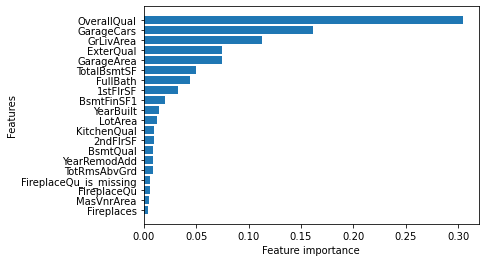

In [276]:
plot_features(X_train.columns, ideal_model.feature_importances_)